In [1]:
%load_ext autoreload
%autoreload 2

# Read the original projected data (face-on projection)

In [2]:
import sys
sys.path.insert(0, '../src')

In [3]:
from tigress_pickle_reader import TigressPickle
import glob
import os

In [4]:
basedir = "../data"
files = sorted(glob.glob(os.path.join(basedir, "*.surf.p")))
print(files)

['../data/R8_2pc_rst.0290.surf.p', '../data/R8_2pc_rst.0300.surf.p', '../data/R8_2pc_rst.0310.surf.p', '../data/R8_2pc_rst.0320.surf.p', '../data/R8_2pc_rst.0330.surf.p', '../data/R8_2pc_rst.0340.surf.p', '../data/R8_2pc_rst.0350.surf.p', '../data/R8_2pc_rst.0360.surf.p', '../data/R8_2pc_rst.0370.surf.p', '../data/R8_2pc_rst.0380.surf.p', '../data/R8_2pc_rst.0390.surf.p', '../data/R8_2pc_rst.0400.surf.p', '../data/R8_2pc_rst.0410.surf.p', '../data/R8_2pc_rst.0420.surf.p', '../data/R8_2pc_rst.0430.surf.p', '../data/R8_2pc_rst.0440.surf.p']


In [5]:
data = TigressPickle(files[-1], verbose=True)

In [6]:
data

TIGRESS-classic pickle output: (512x512) data at time=440.00009999655265
 domain info (length in pc): 
  xmin = -512.0  xmax = 512.0  ymin = -512.0  ymax = 512.0
  Lx = 1024.0  Ly = 1024.0  Nx = 512  Ny = 512
  dx = 2.0  dy = 2.0
 surface density (in Msun/pc^2):4.593584060668945...18.640331268310547

## Surface desnity map

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

Text(0, 0.5, 'y [pc]')

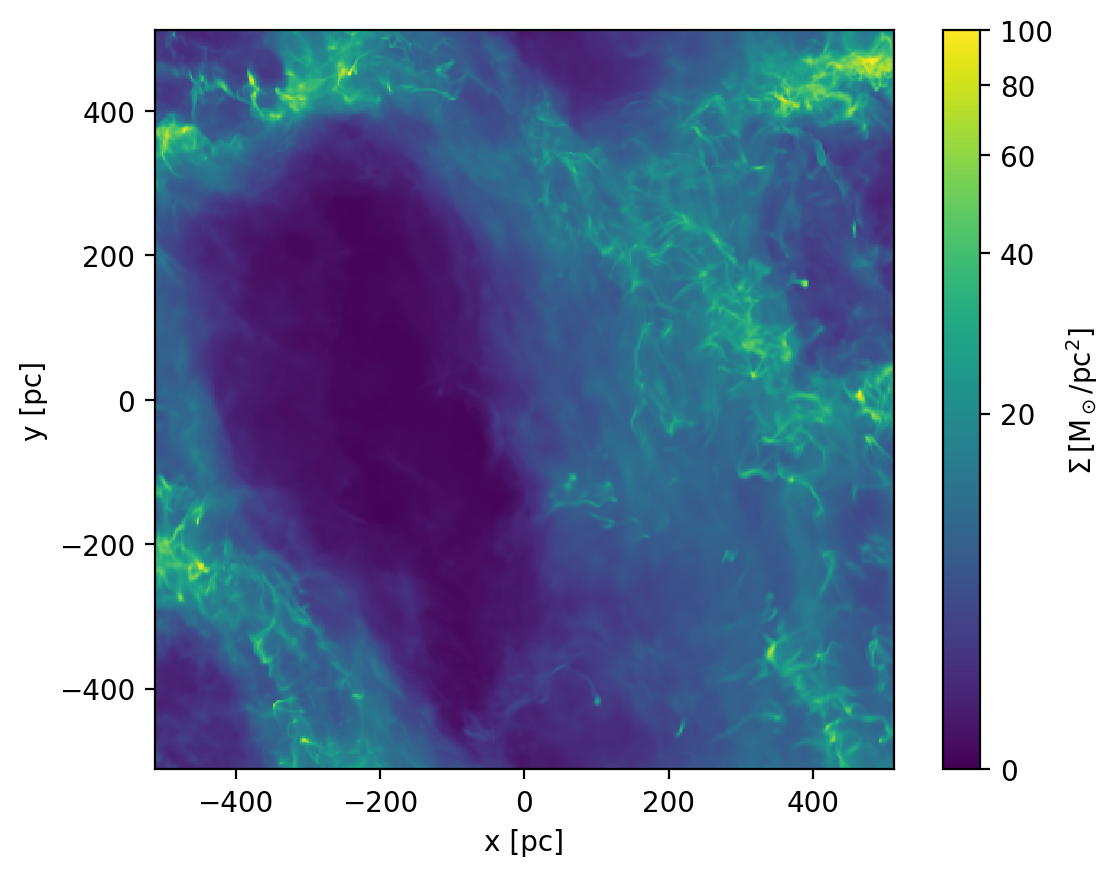

In [8]:
# set image stretch using asinh
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# Surface Density
norm = ImageNormalize(data.surf, vmin=0, vmax=100, stretch=AsinhStretch())
im = plt.pcolormesh(data.coords["x"], data.coords["y"], data.surf, norm=norm)
plt.gca().set_aspect("equal")
plt.colorbar(im, label=r"$\Sigma\,[{\rm M_\odot/pc^2}]$")
plt.xlabel("x [pc]")
plt.ylabel("y [pc]")

Text(0, 0.5, 'y [pc]')

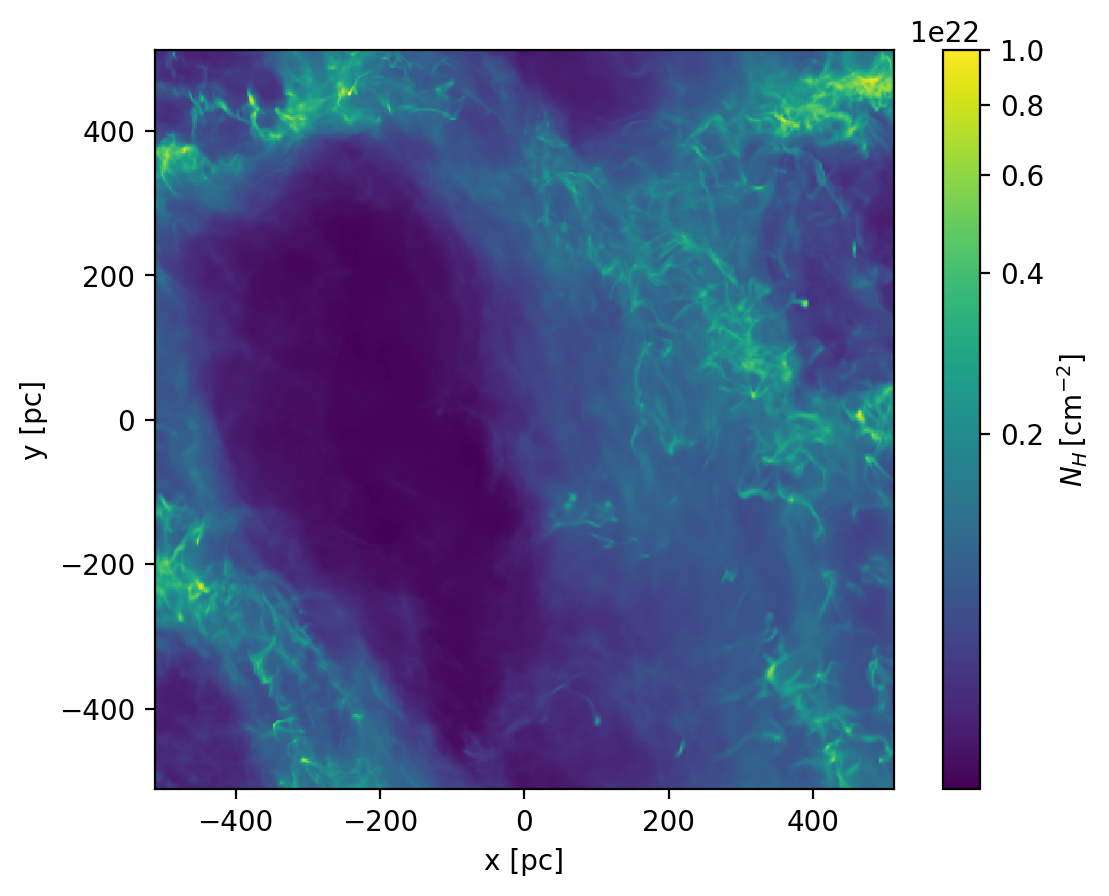

In [9]:
# set image stretch using asinh
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# Column Density
norm = ImageNormalize(data.NH, vmin=1.0e19, vmax=1.0e22, stretch=AsinhStretch())
im = plt.pcolormesh(data.coords["x"], data.coords["y"], data.NH, norm=norm)
plt.gca().set_aspect("equal")
plt.colorbar(im, label=r"$N_H\,[{\rm cm^{-2}}]$")
plt.xlabel("x [pc]")
plt.ylabel("y [pc]")

# Domain Expansion using Shear-Periodic Boundary Conditions

## Motivation

If you want to calculate structure functions for regions touching the boundaries, you need information outside the boundaries, which in simulations you can get based on the boundary conditions applied. If it was simple periodic boundary conditions, expanding the domain should be much easier. But, our simulations utilze the shear-periodic boundary conditions, one has to be careful. If you need to expand the data into bigger domain, use the following example. Otherwise, just ignore this.

## Shear-Periodic Boundary Conditions

In a shearing-box, the background velocity is 
$$ v_{y,shear} = -q\Omega x $$
where the shear parameter $q\equiv -d\ln\Omega/d\ln R|_{R=R_{0}} = 1$ in our simulations. 

The shearing-periodic boundary conditions in $x$ at time $t$ then satisfy, e.g. for density,
$$ \rho(x\pm L_x,y,z) = \rho(x, \mod(y \mp q\Omega L_x t, L_y), z )$$
and all other quantities except $v_y$.

For $y$-velocity, the bacgkround velocity has to be added such that
$$ v_y(x\pm L_x,y,z) = v_y(x, \mod(y \mp q\Omega L_x t, L_y), z) \mp q\Omega L_x$$

In [10]:
from expand_domain import expand_xy

In [11]:
# the code assumes the data is given as xarray.DataArray
xr_data = data.to_xarray()

In [12]:
xr_data

<xarray.DataArray (y: 512, x: 512)> Size: 1MB
array([[ 4.593584 ,  4.679159 ,  4.844091 , ..., 17.09688  , 17.111076 ,
        17.876188 ],
       [ 4.569845 ,  4.6502624,  4.8607945, ..., 16.268501 , 16.424734 ,
        17.73666  ],
       [ 4.5832515,  4.625375 ,  4.901614 , ..., 15.805108 , 16.364351 ,
        17.57131  ],
       ...,
       [ 4.753688 ,  4.6858826,  4.594496 , ..., 22.522846 , 22.075144 ,
        22.505096 ],
       [ 4.6943007,  4.674852 ,  4.6810164, ..., 20.674372 , 19.807106 ,
        20.098103 ],
       [ 4.664191 ,  4.6975904,  4.777556 , ..., 18.68864  , 18.254063 ,
        18.640331 ]], dtype=float32)
Coordinates:
  * y        (y) float64 4kB -511.0 -509.0 -507.0 -505.0 ... 507.0 509.0 511.0
  * x        (x) float64 4kB -511.0 -509.0 -507.0 -505.0 ... 507.0 509.0 511.0

In [13]:
data_xy = expand_xy(xr_data, data.domain, ysh=data.get_yshear())
data_xy = data_xy.sel(x=slice(data.domain["xmin"]*2, data.domain["xmax"]*2),
                      y=slice(data.domain["ymin"]*2, data.domain["ymax"]*2))

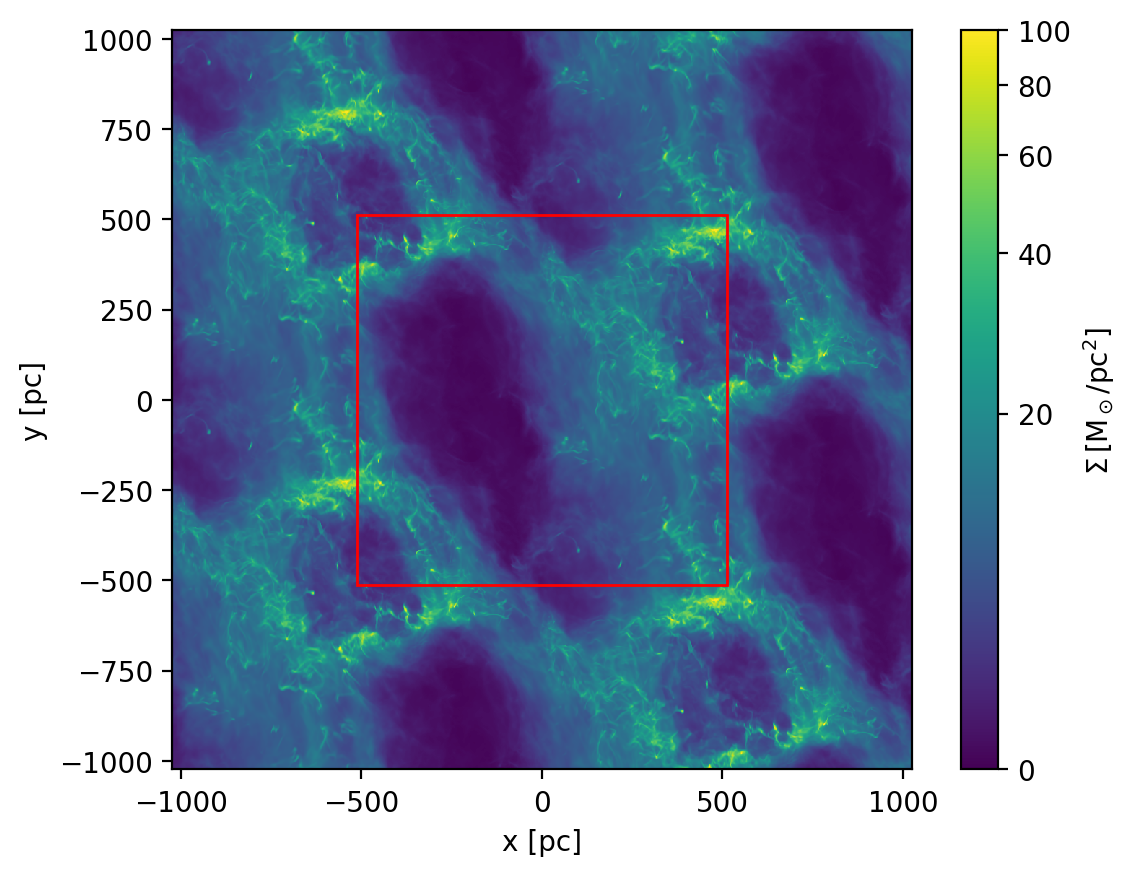

In [14]:
# set image stretch using asinh
from astropy.visualization import AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# Surface Density
norm = ImageNormalize(data_xy, vmin=0, vmax=100, stretch=AsinhStretch())
im = plt.pcolormesh(data_xy.x, data_xy.y, data_xy.data, norm=norm)
plt.gca().set_aspect("equal")
plt.colorbar(im, label=r"$\Sigma\,[{\rm M_\odot/pc^2}]$")
plt.xlabel("x [pc]")
plt.ylabel("y [pc]")

# add a box to show the original domain
import matplotlib.patches as patches

rect = patches.Rectangle(
    (data.domain["xmin"], data.domain["ymin"]),
    data.domain["Lx"],
    data.domain["Ly"],
    linewidth=1,
    edgecolor="r",
    facecolor="none",
)
plt.gca().add_patch(rect)